# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.177471e+01     6.562257e+00
 * time: 0.004754066467285156
     1     2.728369e+01     5.208243e+00
 * time: 0.01351308822631836
     2     2.043366e+01     5.844034e+00
 * time: 0.03550601005554199
     3     1.203565e+01     1.353831e+00
 * time: 0.06600689888000488
     4     1.106748e+01     2.197018e+00
 * time: 0.08413410186767578
     5     1.050305e+01     1.213128e+00
 * time: 0.10116291046142578
     6     1.017320e+01     8.459724e-01
 * time: 0.118988037109375
     7     9.784775e+00     8.858599e-01
 * time: 0.1392829418182373
     8     9.548418e+00     6.294343e-01
 * time: 0.15702605247497559
     9     9.356693e+00     4.514670e-01
 * time: 0.17479705810546875
    10     9.282254e+00     5.490096e-01
 * time: 0.19203495979309082
    11     9.204997e+00     3.396053e-01
 * time: 0.21008610725402832
    12     9.131549e+00     3.972563e-01
 * time: 0.22280311584472656
    13     9.100272e+00     3.463519e-01
 * time: 0

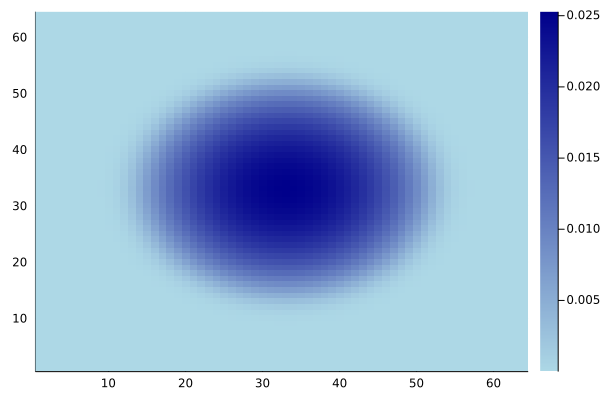

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)